<a style="center;" href="https://www.sorbonne-universite.fr/"><img style="height:120px;" src="https://upload.wikimedia.org/wikipedia/fr/c/cd/Logo_Sorbonne_Universit%C3%A9.png"/></a>

# $$ \text{Optimisation of stratified structures and stacking sequences} $$

$$ \textit{Duvivier Valentin} - CompMech - 2021/2022 $$

$\underline{Abstract}$ : This report is the second part of the homework of the Conception and Optimisation of Composite structures course MU5MES09. It's conducted in order to apply CLPT theory to the case of an orthotropic aerodynamic structure. In this sense we will optimize the structure's stratifaction with respect to first buckling load and stiffness.

It has been done excluesively by Valentin Duvivier, and so I engage myself  by confirming that no part of the following have been plagiarized in any way.

---

The object of the study is a 2D square plate suffering compressive load at its 4 ends, and that is made of multiple layers.

$\underline{\text{Domain}}:$ 2D $(x, y)$ $\equiv$ $[-L/2, +L/2]\times[-L/2, +L/2]$ with $L=1~m$.

$\underline{\text{Material}}:$ stiff composite plate that may present buckling. 

All layers are made of same material which is carbon/epoxy T300/5208 whose elastic properties are : $E_1=181~GPa$, $E_2=10.3~GPa$, $G_{12}=7.17~GPa$, $\nu_{12}=181~GPa$

$\underline{\text{Equations/Hypotheses}}:$ we assume linear elasticity of each layers together with stress plane (i.e. $h=4~mm \ll 1m$) \& strain plane theory. 

We consider simple support on the structure's edges as well as a bi-axial loading characterized by $N_x=2.N_y=-100~N.m^{-1}$

$\underline{\text{Composite structure}}:$ the plate is made of 32 layers that will be assembled through a sequence $\delta_k$, $k=[1, 2, ..., N]$.

Let's now see how one can study this structure using CLPT theory.

#### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Data

In [2]:
def Q_matrix(eng_cst):
    
    """ Function returning 2D Q matrix 
    given materials engineer's constants.
    """
    
    E_1, E_2, nu_12, G_12 = eng_cst
    
    Q = np.array([[     1/E_1, -nu_12/E_2,      0],
                  [-nu_12/E_2,      1/E_2,      0],
                  [      0   ,        0  , 1/G_12]])
    
    return Q

E_1, E_2, nu_12, G_12 = 181.E9, 10.3E9, 0.28, 7.17E9

eng_cst = [E_1, E_2, nu_12, G_12]
Q = Q_matrix(eng_cst)

# ----

# polar components

T_0 = 1/8 * (Q[0,0] - 2*Q[0,1] + 4*Q[2,2] + Q[1,1])
T_1 = 1/8 * (Q[0,0] + 2*Q[0,1] +     0    + Q[1,1])

R_0exp_phi0 = 1/8 * (Q[0,0] - 2*Q[0,1] - 4*Q[2,2] + Q[1,1] + 4j*(Q[0,2] - Q[1,2]))
R_1exp_phi1 = 1/8 * (Q[0,0] +     0    +     0    - Q[1,1] + 2j*(Q[0,2] + Q[1,2]))

R_0 = np.abs(R_0exp_phi0)
R_1 = np.abs(R_1exp_phi1)

Calculation angles phi

In [3]:
re_0, im_0 = np.real(R_0exp_phi0), np.imag(R_0exp_phi0)
phi_0 = 1/4 * np.arctan(im_0/re_0)

# ---

re_1, im_1 = np.real(R_1exp_phi1), np.imag(R_1exp_phi1)
phi_1 = 1/2 * np.arctan(im_1/re_1)

In [4]:
print('\n   T_0 = {:.2e}'.format(T_0))
print('   T_1 = {:.2e}'.format(T_1))
print('   R_0 = {:.2e}'.format(R_0))
print('   R_1 = {:.2e}'.format(R_1))

print('\n   phi_0 = {:.2e}'.format(phi_0))
print('   phi_1 = {:.2e}'.format(phi_1))


   T_0 = 8.94e-11
   T_1 = 6.03e-12
   R_0 = 5.01e-11
   R_1 = 1.14e-11

   phi_0 = -0.00e+00
   phi_1 = -0.00e+00


#### Graphic

In [5]:
# basic layer characteristics

#general
T0_cb = T_0
T1_cb = T_1

R0_cb = R_0
R1_cb = R_1

K = 0

# -----

nb_pts = 100

#i. cross-ply stratification
rho_90 = np.linspace(0., .5, nb_pts)

R_k_1 = (-1)**K * R0_cb * np.ones(len(rho_90))
R_1_1 = R1_cb * (1 - 2*rho_90)

#ii. angle-ply stratification
alpha = np.linspace(0, np.pi/4, nb_pts)

R_k_2 = (-1)**K * R0_cb * np.cos(4*alpha)
R_1_2 = R1_cb * np.cos(2*alpha)

#iii. UD
R_k_3 = (-1)**K * R0_cb
R_1_3 = R1_cb

#iv. cross-ply - rho_90=0.5
rho_90 = 0.5

R_k_4 = (-1)**K * R0_cb
R_1_4 = R1_cb * (1 - 2*rho_90)

#v. angle-ply - alpha=45°
alpha = np.pi/4

R_k_5 = (-1)**K * R0_cb * np.cos(4*alpha)
R_1_5 = R1_cb * np.cos(2*alpha)

#vi. isotropic case
R_k_6 = 0
R_1_6 = 0

C:\Users\vltn0\AppData\Local\Temp/ipykernel_25936/209152643.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(R_k_6, R_1_6, '.', color='red', marker='x', label='isotropic', markersize=markersize)


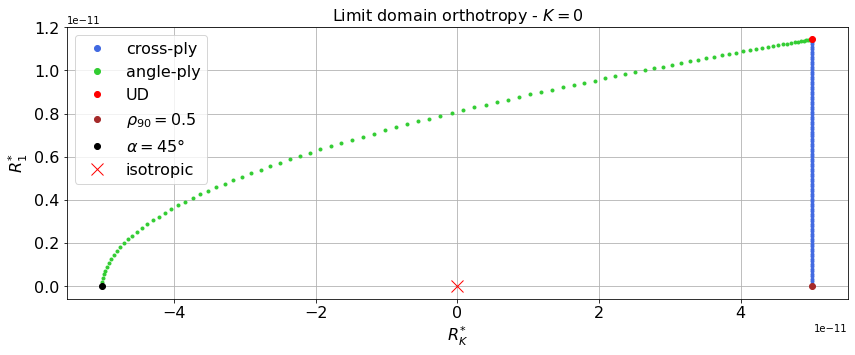

In [6]:
size = 16
markersize = 12

# ---

plt.figure(figsize=(14,5))

plt.plot(R_k_1, R_1_1, '.', color='royalblue', label='cross-ply')
plt.plot(R_k_2, R_1_2, '.', color='limegreen', label='angle-ply')
plt.plot(R_k_3, R_1_3, '.', color='red', label='UD', markersize=markersize)

plt.plot(R_k_4, R_1_4, '.', color='brown', label=r'$\rho_{90}=0.5$', markersize=markersize)
plt.plot(R_k_5, R_1_5, '.', color='k', label=r'$\alpha=45$°', markersize=markersize)
plt.plot(R_k_6, R_1_6, '.', color='red', marker='x', label='isotropic', markersize=markersize)

plt.title('Limit domain orthotropy - $K=0$', size=size)
plt.ylabel(r'$R_1^{*}$', size=size)
plt.xlabel(r'$R_K^{*}$', size=size)

plt.xticks(size=size)
plt.yticks(size=size)

lgnd = plt.legend(prop={'size':size})

#change the marker size manually for both lines
lgnd.legendHandles[0]._legmarker.set_markersize(markersize)
lgnd.legendHandles[1]._legmarker.set_markersize(markersize)

plt.grid(True)

# plt.savefig('limit_graph_part2.pdf')

#### $\lambda$ calculation

In [7]:
# ----
# Data
# ----

#Geometry
L = 1    #[m]
h = 4    #[mm]

N = 32   #[-]
t = h/N  #[mm]

#Material
# E_1, E_2, nu_12, G_12 = already defined

#Forces
Nx = -100; Ny = Nx/2;

# -----------

eng_cst = [E_1, E_2, nu_12, G_12]

def lmbda_function(h, Ny, L, Q, eng_cst, polar_comp):
    
    """ Function returning lmbda
    values given system's variables.
    """
    
    Q = Q_matrix(eng_cst)
    T_0, T_1, R_1, R_K = polar_comp
    
    lmbda = (np.pi**2 * h**3) / (36 * Ny * L**2) * (4*T_0 + 8*T_1 + 0*R_1 - 4*R_K)
    
    return lmbda

#### i. Isotropic

In [8]:
polar_comp = [T_0, T_1, R_1_6, R_k_6] #[T0^cb, T1^cb, R0^*, R1^*]
lmbda_iso = lmbda_function(h, Ny, L, Q, eng_cst, polar_comp)
print('lambda_iso = {:.2E}'.format(np.abs(lmbda_iso)))

lambda_iso = 1.42E-10


#### ii. Unidirectional

In [9]:
polar_comp = [T_0, T_1, R_1_3, R_k_3] #[T0^cb, T1^cb, R0^*, R1^*]
lmbda_UD  = lmbda_function(h, Ny, L, Q, eng_cst, polar_comp)
print('lmbda_UD = {:.2E}'.format(np.abs(lmbda_UD)))

lmbda_UD = 7.20E-11


#### iii. Cross-ply

In [10]:
polar_comp = [T_0, T_1, R_1_4, R_k_4] #[T0^cb, T1^cb, R0^*, R1^*]
lmbda_cp  = lmbda_function(h, Ny, L, Q, eng_cst, polar_comp)
print('lmbda_cp = {:.2E}'.format(np.abs(lmbda_cp)))

lmbda_cp = 7.20E-11


#### iv. Angle-ply

In [11]:
polar_comp = [T_0, T_1, R_1_5, R_k_5] #[T0^cb, T1^cb, R0^*, R1^*]
lmbda_ap  = lmbda_function(h, Ny, L, Q, eng_cst, polar_comp)
print('lmbda_ap = {:.2E}'.format(np.abs(lmbda_ap)))

lmbda_ap = 2.13E-10


---

#### Comparison lambda

In [12]:
np.abs(lmbda_UD - lmbda_ap) / np.abs(lmbda_ap) * 100

66.14146671508556

#### Limit domain $R_K$

In [13]:
R_1_Q7 = T_1*1/3
R_k_lower = (2 * (R_1_Q7 / R_1)**2 - 1) * R_0
print('R_k_lower = {:.2E}'.format(R_k_lower))

R_k_lower = -4.70E-11


C:\Users\vltn0\AppData\Local\Temp/ipykernel_25936/2245087461.py:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(R_k_6, R_1_6, '.', color='red', marker='x', label='isotropic', markersize=markersize)


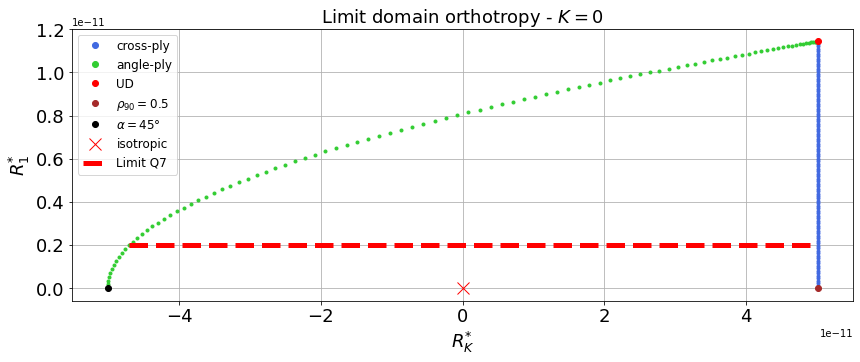

In [14]:
size = 18
markersize = 12

# ---

plt.figure(figsize=(14,5))

plt.plot(R_k_1, R_1_1, '.', color='royalblue', label='cross-ply')
plt.plot(R_k_2, R_1_2, '.', color='limegreen', label='angle-ply')
plt.plot(R_k_3, R_1_3, '.', color='red', label='UD', markersize=markersize)

plt.plot(R_k_4, R_1_4, '.', color='brown', label=r'$\rho_{90}=0.5$', markersize=markersize)
plt.plot(R_k_5, R_1_5, '.', color='k', label=r'$\alpha=45$°', markersize=markersize)
plt.plot(R_k_6, R_1_6, '.', color='red', marker='x', label='isotropic', markersize=markersize)

# NEW LINE
plt.plot([R_k_lower, R_0], [R_1_Q7, R_1_Q7], '--', color='red', lw=5, label='Limit Q7')

plt.title('Limit domain orthotropy - $K=0$', size=size)
plt.ylabel(r'$R_1^{*}$', size=size)
plt.xlabel(r'$R_K^{*}$', size=size)

plt.xticks(size=size)
plt.yticks(size=size)

lgnd = plt.legend(loc=2, prop={'size':markersize})

#change the marker size manually for both lines
lgnd.legendHandles[0]._legmarker.set_markersize(markersize)
lgnd.legendHandles[1]._legmarker.set_markersize(markersize)
lgnd.legendHandles[2]._legmarker.set_markersize(markersize)
lgnd.legendHandles[3]._legmarker.set_markersize(markersize)
lgnd.legendHandles[4]._legmarker.set_markersize(markersize)
lgnd.legendHandles[5]._legmarker.set_markersize(markersize)

plt.grid(True)

# plt.savefig('limit_graph_part2.pdf')

##### i. $R_{K_{min}}^{opt}$

In [15]:
alpha_1 = (np.arccos(R_k_lower / R_0)) / 4 * 180/np.pi

print('alpha = {:.2f}'.format(alpha_1))

alpha = 39.94


##### ii. $R_{K_{max}}^{opt}$

In [16]:
R_k_Q7_2 =  R0_cb
rho_90_2 = (1 - R_1_Q7 / R1_cb) / 2

print('rho_90 = {:.2f}'.format(rho_90_2))

rho_90 = 0.41


In [17]:
rho_90_2*N

13.189923842999415

##### iii. $R_{K}^{opt}$

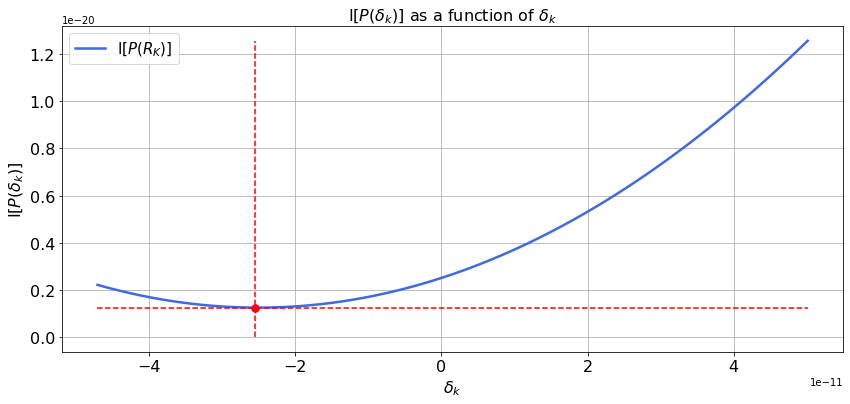

In [18]:
size = 16
markersize = 15

# ---

plt.figure(figsize=(14,6))

# ---------
# Stiffness
# ---------

R_k_opt = - R_0
R_k_vector = np.linspace(R_k_lower, R_0, 100)

I_P_delta_k = R_k_vector**2 + (R_k_vector - R_k_opt)**2

# ---

#get min:
idx = np.where(I_P_delta_k==np.min(I_P_delta_k))[0][0]
I_P_delta_k_min = I_P_delta_k[idx]

# ---

plt.plot(R_k_vector, R_k_vector**2 + (R_k_vector - R_k_opt)**2, '-', color='royalblue', label=r'I[$P(R_K)$]', lw=2.5)

plt.plot(R_k_vector[idx], I_P_delta_k_min, 'r.', markersize=markersize)
plt.plot([R_k_lower, R_k_vector[-1]], [I_P_delta_k_min, I_P_delta_k_min], 'r--')
plt.plot([R_k_vector[idx], R_k_vector[idx]], [0, I_P_delta_k.max()], 'r--')

plt.title(r'I$[P(\delta_k)]$ as a function of $\delta_k$', size=size)
plt.ylabel(r'I$[P(\delta_k)]$', size=size)
plt.xlabel(r'$\delta_k$', size=size)

plt.xticks(size=size)
plt.yticks(size=size)

plt.legend(loc=2, prop={'size':markersize})

plt.grid(True)

# plt.savefig('optimization_phase_2.pdf')

In [19]:
print('R_K_opt = {:.2E}'.format(R_k_vector[idx]))

R_K_opt = -2.54E-11


#### Q8. Optimization

Method 1

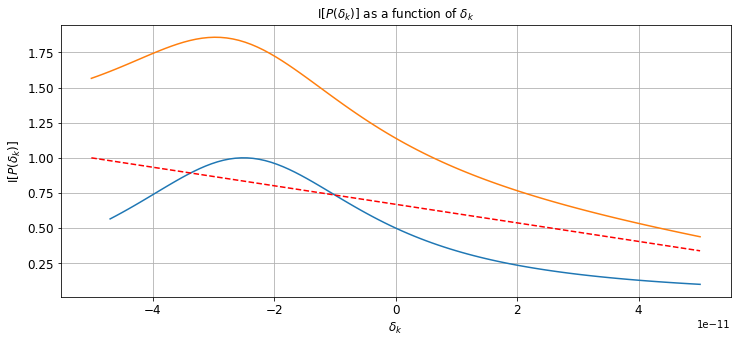

In [20]:
nb_pts = 100
size = 12
markersize = 15

# ---

plt.figure(figsize=(12,5))

# ---------
# Stiffness
# ---------

R_k_opt_stiff = - R_0
R_k_vector_stiff = np.linspace(R_k_lower, R_0, nb_pts)

I_P_delta_k = R_k_vector_stiff**2 + (R_k_vector_stiff - R_k_opt_stiff)**2

# ---

#get min:
idx = np.where(I_P_delta_k==np.min(I_P_delta_k))[0][0]
I_P_delta_k_min = I_P_delta_k[idx]

I_P_delta_k = 1 / I_P_delta_k #from minimization to maximisation problem
I_P_delta_k = I_P_delta_k / I_P_delta_k.max() #normalisation wrt min value

# ---

plt.plot(R_k_vector_stiff, I_P_delta_k)

# ---------------------------------------------------------

# -------------
# Buckling load
# -------------

R_K_vector_buck = np.linspace(-R_0, +R_0, nb_pts)
R_1_opt_buck = 0

lmbda_opt = np.zeros(len(R_K_vector_buck))
for i, R_K in enumerate(R_K_vector_buck):
    polar_comp = [T_0, T_1, R_1_opt_buck, R_K] #[T0^cb, T1^cb, R0^*, R1^*]
    lmbda_opt[i]  = lmbda_function(h, Ny, L, Q, eng_cst, polar_comp)
    
lmbda_opt = lmbda_opt /np.abs(lmbda_opt).max() # normalisation wrt min value

# ---

plt.plot(R_K_vector_buck, np.abs(lmbda_opt), '--', color='red')

# ---------------------------------------------------------

# -------------
# Addition both
# -------------

R_K_vector = np.linspace(-R_0, +R_0, nb_pts)
R_K_opt_vector = np.abs(I_P_delta_k + np.abs(lmbda_opt))

plt.plot(R_K_vector, R_K_opt_vector)

# -----

plt.title(r'I$[P(\delta_k)]$ as a function of $\delta_k$', size=size)
plt.ylabel(r'I$[P(\delta_k)]$', size=size)
plt.xlabel(r'$\delta_k$', size=size)

plt.xticks(size=size)
plt.yticks(size=size)

# plt.legend(loc=2, prop={'size':markersize})

plt.grid(True)

# plt.savefig('optimization_Q8.pdf')

In [21]:
idx = np.where(R_K_opt_vector == R_K_opt_vector.max())[0][0]
R_K_opt = R_K_vector[idx]

print('R_K_opt = {:.2E}'.format(R_K_opt))

R_K_opt = -2.99E-11


Method 2

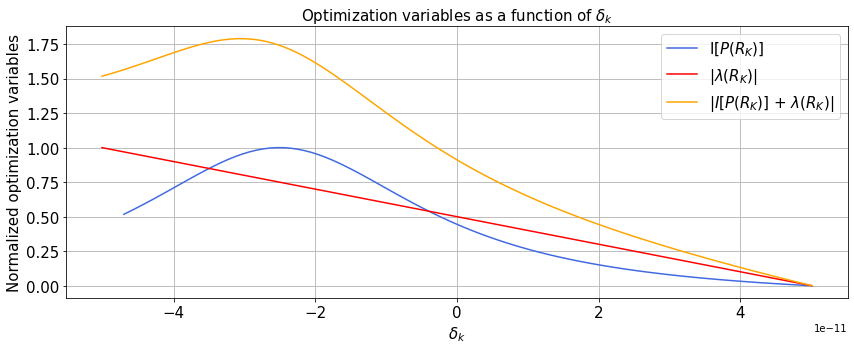

In [28]:
nb_pts = 100
size = 15
markersize = 15

# ---

plt.figure(figsize=(14,5))

# ---------
# Stiffness
# ---------

R_k_opt_stiff = - R_0
R_k_vector_stiff = np.linspace(R_k_lower, R_0, nb_pts)

I_P_delta_k = R_k_vector_stiff**2 + (R_k_vector_stiff - R_k_opt_stiff)**2

# ---

#get min:
idx = np.where(I_P_delta_k==np.min(I_P_delta_k))[0][0]
I_P_delta_k_min = I_P_delta_k[idx]

I_P_delta_k = 1 / I_P_delta_k #from minimization to maximisation problem
I_P_delta_k = I_P_delta_k - I_P_delta_k.min()
I_P_delta_k = I_P_delta_k / I_P_delta_k.max() #normalisation wrt min value

# ---

plt.plot(R_k_vector_stiff, I_P_delta_k, '-', color='royalblue', label=r'I$[P(R_K)]$')

# ---------------------------------------------------------

# -------------
# Buckling load
# -------------

R_K_vector_buck = np.linspace(-R_0, +R_0, nb_pts)
R_1_opt_buck = 0

lmbda_opt = np.zeros(len(R_K_vector_buck))
for i, R_K in enumerate(R_K_vector_buck):
    polar_comp = [T_0, T_1, R_1_opt_buck, R_K] #[T0^cb, T1^cb, R0^*, R1^*]
    lmbda_opt[i]  = lmbda_function(h, Ny, L, Q, eng_cst, polar_comp)
    
lmbda_opt = (lmbda_opt - lmbda_opt.max())
lmbda_opt = lmbda_opt / np.abs(lmbda_opt).max() # normalisation wrt min value

# ---

plt.plot(R_K_vector_buck, np.abs(lmbda_opt), '-', color='red', label=r'|$\lambda(R_K)$|')

# ---------------------------------------------------------

R_K_vector = np.linspace(-R_0, +R_0, nb_pts)
R_K_opt_vector = np.abs(I_P_delta_k + np.abs(lmbda_opt))

# ---

plt.plot(R_K_vector, R_K_opt_vector, '-', color='orange', label=r'$|I[P(R_K)]$ + $\lambda(R_K)$|')

plt.title(r'Optimization variables as a function of $\delta_k$', size=size)
plt.ylabel('Normalized optimization variables', size=size)
plt.xlabel(r'$\delta_k$', size=size)

plt.xticks(size=size)
plt.yticks(size=size)

lgnd=plt.legend(loc=1, prop={'size':markersize})

lgnd.legendHandles[0]._legmarker.set_markersize(markersize)
lgnd.legendHandles[1]._legmarker.set_markersize(markersize)
lgnd.legendHandles[2]._legmarker.set_markersize(markersize)

plt.grid(True)

# plt.savefig('optimization_Q8.pdf')

In [23]:
idx = np.where(R_K_opt_vector == R_K_opt_vector.max())[0][0]
R_K_opt = R_K_vector[idx]

print('R_K_opt = {:.2E}'.format(R_K_opt))

R_K_opt = -3.09E-11


**We see from both normalization methods that the optimization process leads to $R_K \approx -3E^{-11}$.**

**Both methods 1 and 2 provide consistent results given the position of $R_K^{opt}$ in the graph ; and the value $R_K$ is unique as aimed.**

---

### Conclusion

During this report we went from an analytical approach to numerical applications and modelisation of a physical subject : composite structures. We have then been able to reduce CLPT theory to simple orthotropic cases and deduce values as well as limiting domain for polar variables. We furthermore looked at some arbitrary points in order to test physical response.

It resulted that an optimization process comes with theoretical assumption that translate a physical behavior. Once we knew what physical behavior we had to model (from geometry, applications, etc) we adapted consequently the CLPT and working with non-dimensional polar variables in polar framework, we concluded on an optimal set of polar parameters, optimizing stiffness and first buckling load.

Eventually, the optimization process provided an optimal case, and it would be a good expansion of this numerical study to have experimental data to compare.

In a more personal conclusions, the last application to composite structures has been the opportunity to have some insight on a real application case as well as the numerical process one must undergo to analyse a structure, combining theory of plates, physical perspective, stratification theory, etc.

**THE END.**